In [209]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
import sys,os
import pandas as pd
import numpy as np
from ggplot import *
import seaborn as sns; sns.set()
from pylab import *

In [210]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 12, 'text.usetex': True})
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [211]:
df=pd.read_csv('data/Eviction_Notices.csv', parse_dates=['File Date','Constraints Date'], infer_datetime_format=True)
print df.shape
df.head()

(36019, 29)


,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Roommate Same Unit,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location
0,M162268,2700 Block Of San Bruno Avenue,San Francisco,CA,94134,2016-06-24,False,False,False,False,...,False,False,False,False,False,False,08/22/2021,9.0,Portola,"(37.727050746607, -122.403281820714)"
1,M161957,300 Block Of Park Street,San Francisco,CA,94110,2016-06-06,False,False,False,False,...,False,False,False,False,False,False,nan,9.0,Bernal Heights,"(37.7364374645373, -122.417989910582)"
2,M162256,200 Block Of Seneca Avenue,San Francisco,CA,94112,2016-06-29,False,False,False,False,...,False,False,False,False,False,False,08/25/2021,11.0,Outer Mission,"(37.7205429316262, -122.443264852669)"
3,M162135,200 Block Of Dolores Street,San Francisco,CA,94103,2016-06-28,False,True,False,False,...,False,False,False,False,False,False,nan,8.0,Castro/Upper Market,"(37.7652067507312, -122.426591617441)"
4,M161901,1200 Block Of 9th Avenue,San Francisco,CA,94122,2016-06-02,False,False,False,False,...,False,False,False,False,False,False,nan,5.0,Inner Sunset,"(37.764977785911, -122.4664456379)"


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36019 entries, 0 to 36018
Data columns (total 29 columns):
Eviction ID                            36019 non-null object
Address                                36019 non-null object
City                                   36017 non-null object
State                                  36018 non-null object
Eviction Notice Source Zipcode         35229 non-null object
File Date                              36019 non-null datetime64[ns]
Non Payment                            36019 non-null bool
Breach                                 36019 non-null bool
Nuisance                               36019 non-null bool
Illegal Use                            36019 non-null bool
Failure to Sign Renewal                36019 non-null bool
Access Denial                          36019 non-null bool
Unapproved Subtenant                   36019 non-null bool
Owner Move In                          36019 non-null bool
Demolition                             36019 

In [213]:
# df.Location.value_counts()

In [214]:
# df['Eviction Notice Source Zipcode'].value_counts()

In [215]:
date=pd.to_datetime(df['File Date'])
print date.min()
print date.max()
t_delta=(date-date.min()).astype('timedelta64[D]')
df['days']=t_delta
df.head(5)

1997-01-02 00:00:00
2016-06-30 00:00:00


,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location,days
0,M162268,2700 Block Of San Bruno Avenue,San Francisco,CA,94134,2016-06-24,False,False,False,False,...,False,False,False,False,False,08/22/2021,9.0,Portola,"(37.727050746607, -122.403281820714)",7113.0
1,M161957,300 Block Of Park Street,San Francisco,CA,94110,2016-06-06,False,False,False,False,...,False,False,False,False,False,nan,9.0,Bernal Heights,"(37.7364374645373, -122.417989910582)",7095.0
2,M162256,200 Block Of Seneca Avenue,San Francisco,CA,94112,2016-06-29,False,False,False,False,...,False,False,False,False,False,08/25/2021,11.0,Outer Mission,"(37.7205429316262, -122.443264852669)",7118.0
3,M162135,200 Block Of Dolores Street,San Francisco,CA,94103,2016-06-28,False,True,False,False,...,False,False,False,False,False,nan,8.0,Castro/Upper Market,"(37.7652067507312, -122.426591617441)",7117.0
4,M161901,1200 Block Of 9th Avenue,San Francisco,CA,94122,2016-06-02,False,False,False,False,...,False,False,False,False,False,nan,5.0,Inner Sunset,"(37.764977785911, -122.4664456379)",7091.0


In [216]:
# date_c=pd.to_datetime(df['Constraints Date'])
# print date_c.min()
# print date_c.max()


In [217]:
df.tail()

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location,days
36014,M140022,5100 Block Of Diamond Heights Boulevard,San Francisco,CA,94131,2014-02-19,False,False,False,False,...,False,False,False,False,False,nan,8.0,Noe Valley,"(37.7468468005123, -122.440404829259)",6257.0
36015,M101032,300 Block Of Divisadero Street,San Francisco,CA,94117,2010-08-02,False,True,True,False,...,False,False,False,False,False,nan,5.0,Haight Ashbury,"(37.772653845321, -122.437444930138)",4960.0
36016,M041760,300 Block Of Crestlake Drive,San Francisco,CA,94132,2004-10-06,False,False,False,False,...,False,False,False,False,False,10/05/2007,4.0,Sunset/Parkside,"(37.7351538047649, -122.487187677231)",2834.0
36017,E981390,400 Block Of Silver Avenue,San Francisco,CA,94112,1998-06-23,False,False,False,False,...,False,False,False,False,False,nan,11.0,Excelsior,"(37.7285368907577, -122.426997607705)",537.0
36018,M062339,1000 Block Of Green Street,San Francisco,CA,94109,2006-11-15,True,False,False,False,...,False,False,False,False,False,nan,3.0,Russian Hill,"(37.7986303850045, -122.416405936693)",3604.0


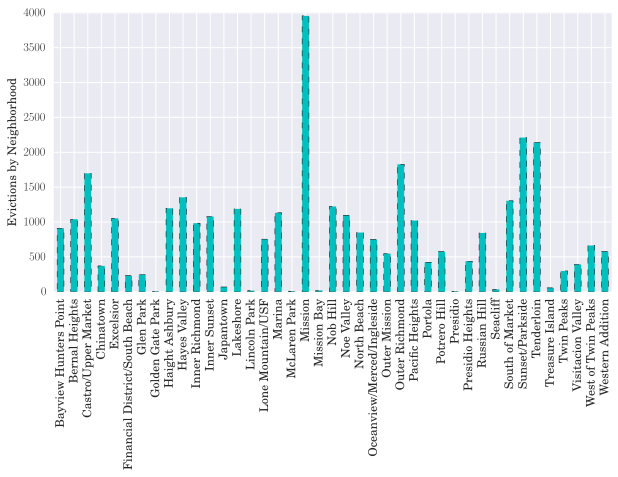

In [254]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort_values()
    fig=plt.figure(figsize=(10,5), dpi=300)
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='c',linestyle='dashed', linewidth=0.5)
    plt.xlabel('')
    plt.ylabel('Evictions by Neighborhood',fontsize=12)

plotdat(df,'Neighborhoods - Analysis Boundaries')

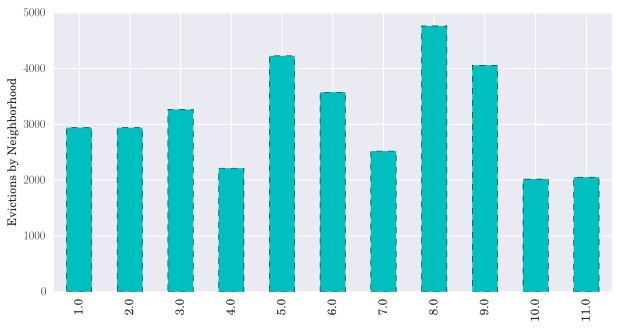

In [219]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort_values()
    fig=plt.figure(figsize=(10,5), dpi=300)
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='c',linestyle='dashed', linewidth=0.5)
    plt.xlabel('')
    plt.ylabel('Evictions by Neighborhood',fontsize=12)

plotdat(df,'Supervisor District')



In [220]:
l=df.groupby('Development').size()
l.sort()
print l.shape

(2,)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36019 entries, 0 to 36018
Data columns (total 30 columns):
Eviction ID                            36019 non-null object
Address                                36019 non-null object
City                                   36017 non-null object
State                                  36018 non-null object
Eviction Notice Source Zipcode         35229 non-null object
File Date                              36019 non-null datetime64[ns]
Non Payment                            36019 non-null bool
Breach                                 36019 non-null bool
Nuisance                               36019 non-null bool
Illegal Use                            36019 non-null bool
Failure to Sign Renewal                36019 non-null bool
Access Denial                          36019 non-null bool
Unapproved Subtenant                   36019 non-null bool
Owner Move In                          36019 non-null bool
Demolition                             36019 

In [222]:
df.Demolition.value_counts()

False    34870
True      1149
Name: Demolition, dtype: int64

In [223]:
df['Condo Conversion'].value_counts()

False    35912
True       107
Name: Condo Conversion, dtype: int64

In [224]:
# features = ['Non Payment',
#           'Breach',
#           'Nuisance',
#           'Illegal Use',
#           'Failure to Sign Renewal',
#           'Access Denial',
#           'Unapproved Subtenant',
#           'Owner Move In', 
#           'Demolition', 
#           'Capital Improvement',
#           'Substantial Rehab' ,
#           'Ellis Act WithDrawal',
#           'Condo Conversion',
#           'Roommate Same Unit',
#           'Other Cause',
#           'Late Payments',
#           'Lead Remediation',
#           'Development',
#           'Good Samaritan Ends']

In [225]:
conversion = df['Condo Conversion'] == True

In [226]:
cc = df[conversion]

In [227]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 99 to 35769
Data columns (total 30 columns):
Eviction ID                            107 non-null object
Address                                107 non-null object
City                                   107 non-null object
State                                  107 non-null object
Eviction Notice Source Zipcode         106 non-null object
File Date                              107 non-null datetime64[ns]
Non Payment                            107 non-null bool
Breach                                 107 non-null bool
Nuisance                               107 non-null bool
Illegal Use                            107 non-null bool
Failure to Sign Renewal                107 non-null bool
Access Denial                          107 non-null bool
Unapproved Subtenant                   107 non-null bool
Owner Move In                          107 non-null bool
Demolition                             107 non-null bool
Capital Improveme

In [228]:
cc['Condo Conversion'].value_counts()

True    107
Name: Condo Conversion, dtype: int64

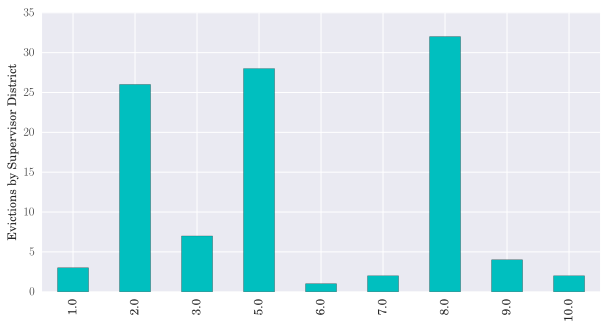

In [258]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort_values()
    fig=plt.figure(figsize=(10,5), dpi=300)
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='c',linestyle='-', linewidth=0.25)
    plt.xlabel('')
    plt.ylabel('Evictions by Supervisor District',fontsize=12)

plotdat(cc,'Supervisor District')



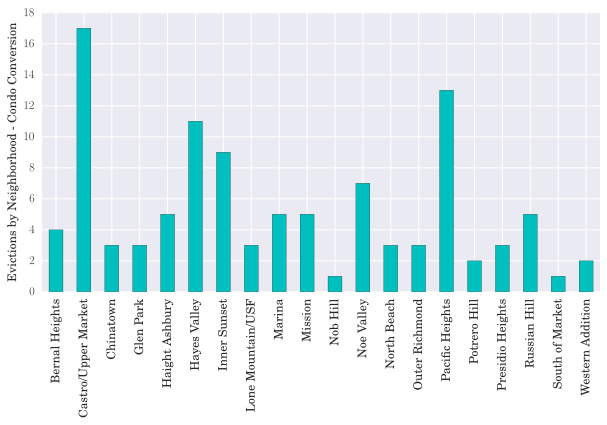

In [261]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort_values()
    fig=plt.figure(figsize=(10,5), dpi=300)
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='c',linestyle='-', linewidth=0.25)
    plt.xlabel('')
    plt.ylabel('Evictions by Neighborhood - Condo Conversion',fontsize=12)

plotdat(cc,'Neighborhoods - Analysis Boundaries')



In [231]:
df.Demolition.value_counts()

False    34870
True      1149
Name: Demolition, dtype: int64

In [232]:
demo = df['Demolition'] == True

In [233]:
df_demo = df[demo]

In [234]:
df_demo.head(10)

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location,days
116,M161908,2500 Block Of Sacramento Street,San Francisco,CA,94118,2016-06-02,False,False,False,False,...,False,False,False,False,False,nan,2.0,Pacific Heights,"(37.7897873622404, -122.434861053777)",7091.0
209,M052025,3100 Block Of 24th Street,San Francisco,CA,94110,2005-10-26,False,False,False,False,...,False,False,False,False,False,nan,9.0,Mission,"(37.7523514547128, -122.415713588442)",3219.0
219,M2K0061,400 Block Of South Van Ness Avenue,San Francisco,CA,94103,2000-01-07,False,False,False,False,...,False,False,False,False,False,nan,9.0,Mission,"(37.7662829464408, -122.417524903065)",1100.0
285,M012106,500 Block Of Sanchez Street,San Francisco,CA,94114,2001-12-06,False,False,False,False,...,False,False,False,False,False,nan,8.0,Castro/Upper Market,"(37.7607522220265, -122.430604286718)",1799.0
309,M152956,200 Block Of Rome Street,San Francisco,CA,94112,2015-10-28,False,False,False,False,...,False,False,False,False,False,nan,11.0,Outer Mission,"(37.7152832207725, -122.446945630245)",6873.0
375,M2K0858,1600 Block Of Dolores Street,San Francisco,CA,94110,2000-05-10,False,False,False,False,...,False,False,False,False,False,nan,8.0,Noe Valley,"(37.7426453580223, -122.424119996785)",1224.0
425,M080086,900 Block Of Naples Street,San Francisco,CA,94112,2008-01-16,False,False,False,False,...,False,False,False,False,False,nan,11.0,Excelsior,"(37.7147672748547, -122.435700868574)",4031.0
428,M020083,0 Block Of Julia Avenue,San Francisco,CA,941,2002-01-24,False,False,False,False,...,False,False,False,False,False,nan,NaN,NaN,NaN,1848.0
469,M040712,4300 Block Of Cabrillo Street,San Francisco,CA,94121,2004-04-30,False,False,False,False,...,False,False,False,False,False,nan,1.0,Outer Richmond,"(37.7735355713861, -122.505217658117)",2675.0
515,M012151,100 Block Of Broad Street,San Francisco,CA,94112,2001-12-19,False,False,False,False,...,False,False,False,False,False,nan,11.0,Oceanview/Merced/Ingleside,"(37.7132377404744, -122.457539370247)",1812.0


In [235]:
df_demo.values

array([['M161908', '2500 Block Of Sacramento  Street', 'San Francisco',
        ..., 'Pacific Heights', '(37.7897873622404, -122.434861053777)',
        7091.0],
       ['M052025', '3100 Block Of 24th  Street', 'San Francisco', ...,
        'Mission', '(37.7523514547128, -122.415713588442)', 3219.0],
       ['M2K0061', '400 Block Of South Van Ness  Avenue', 'San Francisco',
        ..., 'Mission', '(37.7662829464408, -122.417524903065)', 1100.0],
       ..., 
       ['M010853', '2100 Block Of Pacific  Avenue', 'San Francisco', ...,
        'Pacific Heights', '(37.793817953447, -122.430615255987)', 1583.0],
       ['M020529', '1400 Block Of 21st  Avenue', 'San Francisco', ...,
        'Sunset/Parkside', '(37.7606686218555, -122.479139843008)', 1943.0],
       ['M050075', '300 Block Of Dolores  Street', 'San Francisco', ...,
        'Castro/Upper Market', '(37.7634973390253, -122.426428418376)',
        2939.0]], dtype=object)

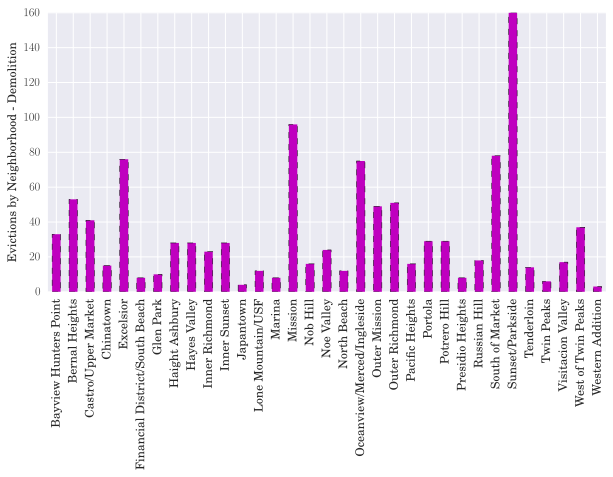

In [236]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort_values()
    fig=plt.figure(figsize=(10,5), dpi=300)
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='m',linestyle='dashed', linewidth=0.5)
    plt.xlabel('')
    plt.ylabel('Evictions by Neighborhood - Demolition',fontsize=12)

plotdat(df_demo,'Neighborhoods - Analysis Boundaries')

In [237]:
df.head()

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location,days
0,M162268,2700 Block Of San Bruno Avenue,San Francisco,CA,94134,2016-06-24,False,False,False,False,...,False,False,False,False,False,08/22/2021,9.0,Portola,"(37.727050746607, -122.403281820714)",7113.0
1,M161957,300 Block Of Park Street,San Francisco,CA,94110,2016-06-06,False,False,False,False,...,False,False,False,False,False,nan,9.0,Bernal Heights,"(37.7364374645373, -122.417989910582)",7095.0
2,M162256,200 Block Of Seneca Avenue,San Francisco,CA,94112,2016-06-29,False,False,False,False,...,False,False,False,False,False,08/25/2021,11.0,Outer Mission,"(37.7205429316262, -122.443264852669)",7118.0
3,M162135,200 Block Of Dolores Street,San Francisco,CA,94103,2016-06-28,False,True,False,False,...,False,False,False,False,False,nan,8.0,Castro/Upper Market,"(37.7652067507312, -122.426591617441)",7117.0
4,M161901,1200 Block Of 9th Avenue,San Francisco,CA,94122,2016-06-02,False,False,False,False,...,False,False,False,False,False,nan,5.0,Inner Sunset,"(37.764977785911, -122.4664456379)",7091.0


In [238]:
illegal = df['Illegal Use'] == True

In [239]:
df_i = df[illegal]

In [240]:
df_i.head()

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location,days
28,M161907,2000 Block Of Beach Street,San Francisco,CA,94123,2016-06-02,False,False,False,True,...,False,False,False,False,False,nan,2.0,Marina,"(37.8038649679209, -122.442782026482)",7091.0
53,M161988,2800 Block Of California Street,San Francisco,CA,94115,2016-06-15,False,False,False,True,...,False,False,False,False,False,nan,2.0,Pacific Heights,"(37.7879071326667, -122.441263904736)",7104.0
59,M161994,2400 Block Of Filbert Street,San Francisco,CA,94123,2016-06-15,False,False,False,True,...,False,False,False,False,False,nan,2.0,Marina,"(37.7974438394496, -122.439778049704)",7104.0
62,M162119,200 Block Of South Van Ness Avenue,San Francisco,CA,94103,2016-06-27,False,False,False,True,...,False,False,False,False,False,nan,9.0,Mission,"(37.7688016803001, -122.417713021943)",7116.0
102,M161936,3600 Block Of 19th Street,San Francisco,CA,94110,2016-06-06,False,False,False,True,...,False,False,False,False,False,nan,8.0,Mission,"(37.7599163365483, -122.425397003646)",7095.0


In [241]:
df_i['Neighborhoods - Analysis Boundaries'].value_counts()

Mission                           80
Tenderloin                        74
Pacific Heights                   36
Outer Richmond                    35
Oceanview/Merced/Ingleside        35
South of Market                   34
Castro/Upper Market               31
Nob Hill                          30
Hayes Valley                      30
Noe Valley                        30
Excelsior                         27
Bayview Hunters Point             26
Sunset/Parkside                   25
Bernal Heights                    24
Western Addition                  23
Marina                            21
Russian Hill                      19
Haight Ashbury                    19
Outer Mission                     15
North Beach                       14
Visitacion Valley                 13
Chinatown                         12
Financial District/South Beach    11
Inner Sunset                      11
Lone Mountain/USF                  9
Potrero Hill                       7
Inner Richmond                     6
P

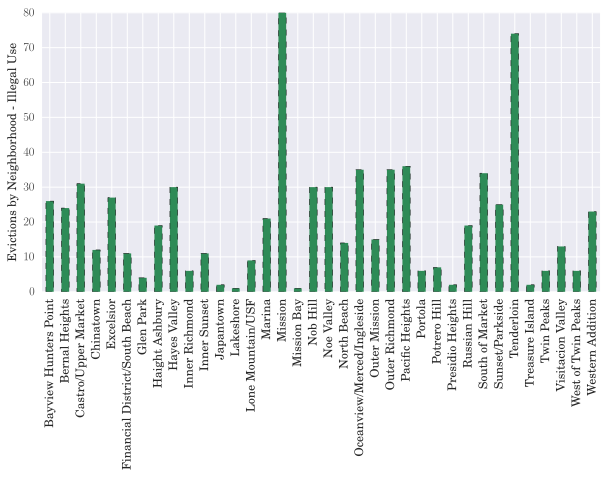

In [242]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort_values()
    fig=plt.figure(figsize=(10,5), dpi=300)
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='seagreen',linestyle='dashed', linewidth=0.5)
    plt.xlabel('')
    plt.ylabel('Evictions by Neighborhood - Illegal Use',fontsize=12)

plotdat(df_i,'Neighborhoods - Analysis Boundaries')

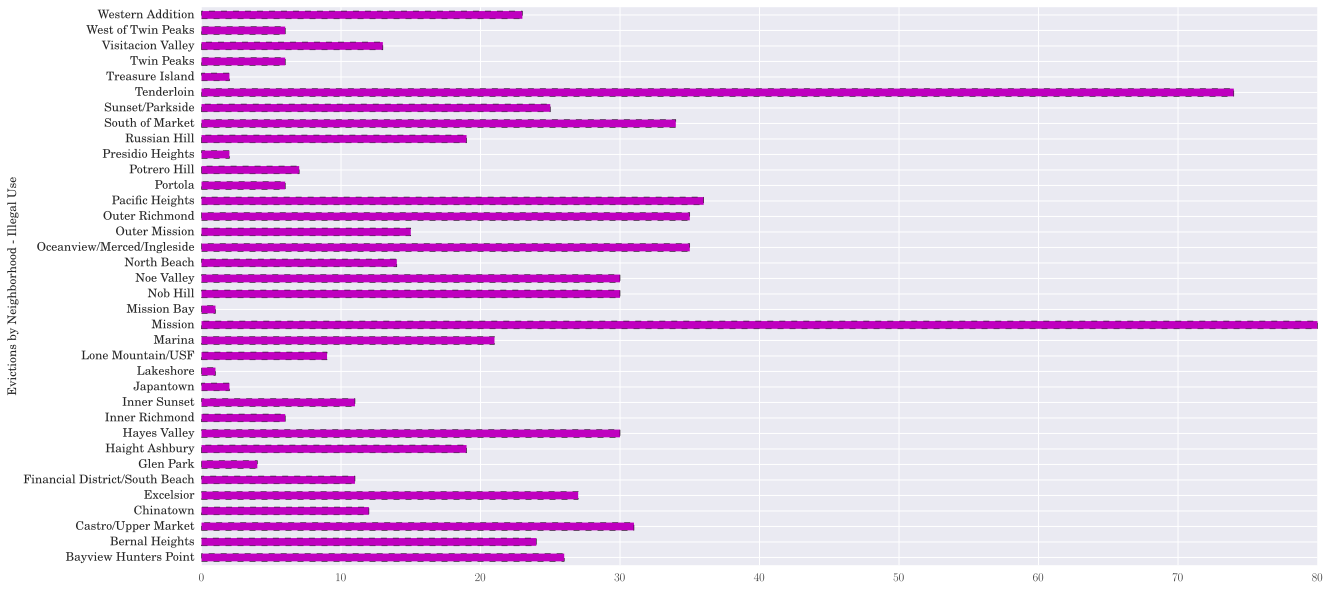

In [243]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort_values()
    fig=plt.figure(figsize=(20,10), dpi=300)
    plt.yticks(fontsize=8)
    l.plot(kind='barh',fontsize=12,color='m',linestyle='dashed', linewidth=0.5)
    plt.xlabel('')
    plt.ylabel('Evictions by Neighborhood - Illegal Use',fontsize=12)

plotdat(df_i,'Neighborhoods - Analysis Boundaries')

In [244]:
i = df_i['Neighborhoods - Analysis Boundaries'].value_counts()

In [245]:
# sns.kdeplot(i)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36019 entries, 0 to 36018
Data columns (total 30 columns):
Eviction ID                            36019 non-null object
Address                                36019 non-null object
City                                   36017 non-null object
State                                  36018 non-null object
Eviction Notice Source Zipcode         35229 non-null object
File Date                              36019 non-null datetime64[ns]
Non Payment                            36019 non-null bool
Breach                                 36019 non-null bool
Nuisance                               36019 non-null bool
Illegal Use                            36019 non-null bool
Failure to Sign Renewal                36019 non-null bool
Access Denial                          36019 non-null bool
Unapproved Subtenant                   36019 non-null bool
Owner Move In                          36019 non-null bool
Demolition                             36019 

In [247]:
groupedAnalysis = df.groupby('Neighborhoods - Analysis Boundaries')
g = groupedAnalysis['Neighborhoods - Analysis Boundaries'].count().sort_values(ascending=False)[:5]

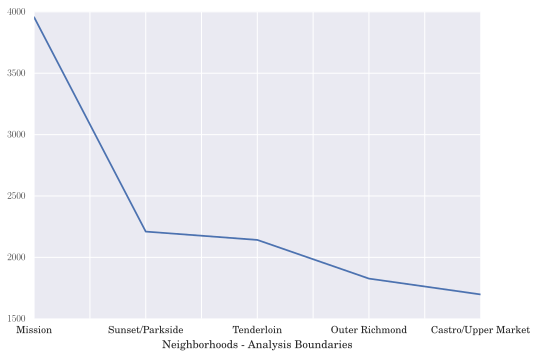

In [248]:
g.plot()

In [249]:
groupedAnalysis_i = df_i.groupby('Neighborhoods - Analysis Boundaries')
gi = groupedAnalysis_i['Neighborhoods - Analysis Boundaries'].count().sort_values(ascending=False)[:5]

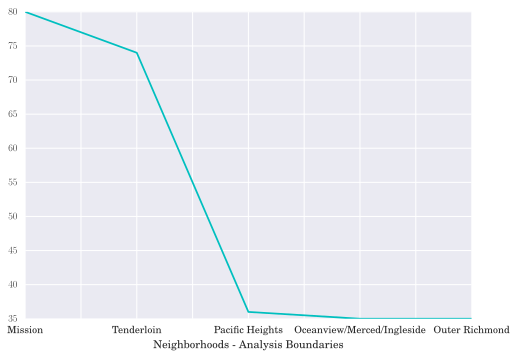

In [250]:
gi.plot(color='c')

In [251]:
groupedAnalysis_d = df_demo.groupby('Neighborhoods - Analysis Boundaries')
gd = groupedAnalysis_d['Neighborhoods - Analysis Boundaries'].count().sort_values(ascending=False)[:5]

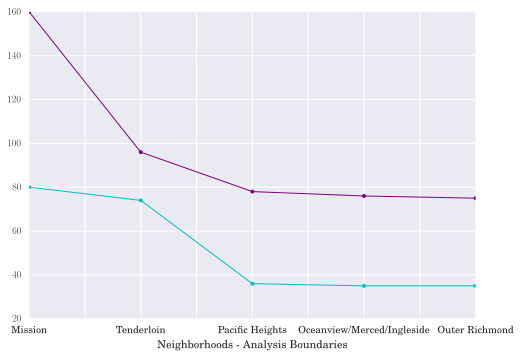

In [252]:
gd.plot(color="purple", lw=1, ls='-', marker='o', markersize=4)
gi.plot(color='c',lw=1, ls='-', marker='o', markersize=4)


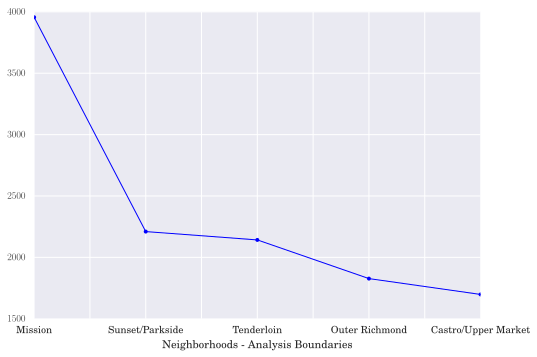

In [253]:
g.plot(color='blue',lw=1, ls='-', marker='o', markersize=4)